<div class="namebox">    
Double Click to edit and enter your

1.  David Wang
2.  A16035204
3.  dlwang@ucsd.edu
    
</div>

,index,threads,size,arg1,IC,CPI,CT,ET,L1_dcache_miss_rate
0,0,1,4096,8,343121763,0.833461,0.389616,0.111422,0.000044
1,1,2,4096,8,689177382,0.818640,0.204992,0.115654,0.000076
2,2,3,4096,8,1039001354,0.814892,0.139795,0.118361,0.000072
3,3,4,4096,8,1380833634,0.805657,0.107019,0.119056,0.000069


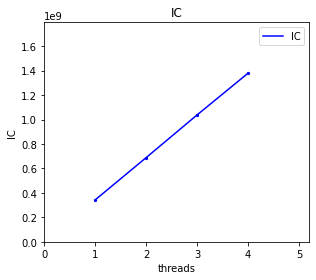

In [8]:
#key data_cell display_mono(render_csv("threads.csv", columns=["threads",\ 
"size", "arg1", "IC", "CPI", "CT", "ET", "L1_dcache_miss_rate"]))\ 
plotPE("threads.csv", lines=True, what=[("threads", "IC")])

<div class="alert alert-block alert-success">

### Question 1 (CSE142 & CSE142L)

With 4 threads how many total instructions were executed? **Please discussion why the observed number makes sense in addition to your measurement results**.

</div>

<div class="alert alert-block alert-success">

**Total IC:** 1380833634

**Why this make sense?** Each thread adds its own IC to the total as the threads are identical.

</div>

<div class="alert alert-block alert-warning">

### Question 2 (CSE142L Only)



In the above code, will the `std::cerr` line ever execute?  Why or why not? 
    
Please clearly state your answer and provide explainations. You need to give good enough reasons for question to receive credits.


</div>

<div class="alert alert-block alert-warning">

Answer: It should be. T0 will spend time waiting for an other_id, which will happen when T1 sets other_value and flag to 1. This should mean that STF:cer never executes, but due to Out of order execution, it sometimes does.
</div>

<div class="alert alert-block alert-warning">

### Question 3 (CSE142L Only)



Based on the assembly above, and assuming multiple threads are running at once, explain how `shared` ends up being computed incorrectly without locks and how adding locks prevents it. Please provide explainations. You need to give good enough reasons to receive credits.
  

</div>

<div class="alert alert-block alert-warning">    

Answer:  Without locks, the mov load command can skip a increment where when they retrieve the same value


</div>


,threads,locks,IC per increment,CPI,ET,Cycles per increment,L1 Misses Per Increment
0,1,1,58.985852,0.650349,0.880281,38.361406,0.000179
1,1,0,4.977483,0.725654,0.094463,3.611928,0.000133
2,2,1,207.888926,1.934272,2.308439,402.113676,0.602028
3,2,0,9.941420,0.982495,0.067842,9.767397,0.044628
4,3,1,347.729193,2.190634,2.078008,761.747302,1.245370
5,3,0,15.283235,1.166748,0.053705,17.831691,0.051533
6,4,1,570.685640,2.527953,2.420704,1442.666206,3.310322
7,4,0,19.577834,1.188334,0.044717,23.264998,0.062869


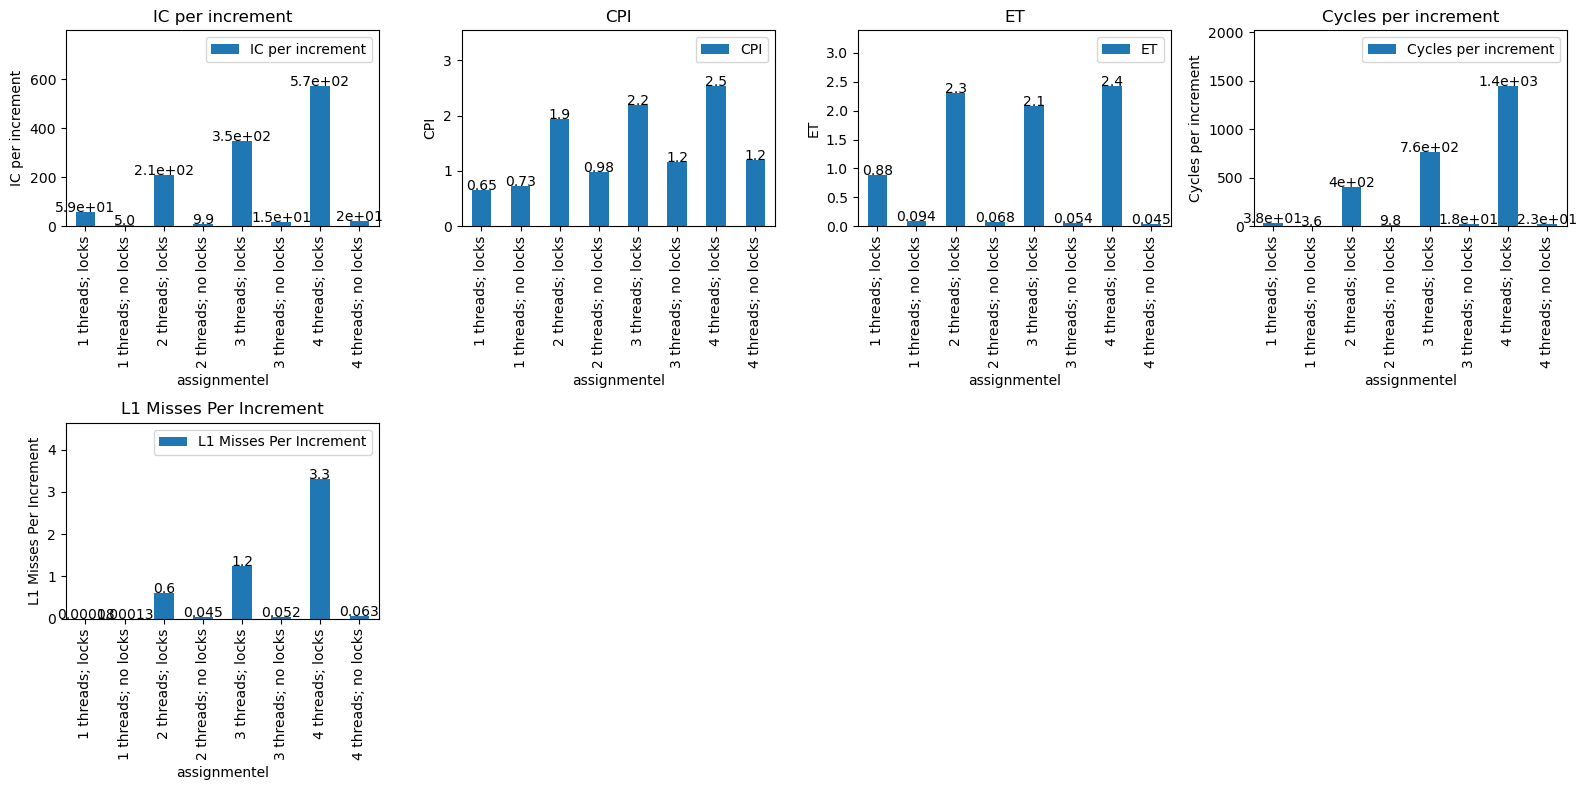

In [16]:
#key data_cell from notebook import * df = render_csv("lock_demo.csv")\ 
df["assignmentel"] = df["threads"].apply(lambda x: f"{x} threads;" ) + " " +\ 
df["arg2"].apply(lambda x: "locks" if x else "no locks") df["Total IC"] =\ 
df["IC"] * df["threads"] df["IC per increment"] =\ 
df["IC"]/(df["arg1"]/df["threads"]) df["Cycles per increment"] =\ 
df["Cycles"]/(df["arg1"]/df["threads"]) df["L1 Misses Per Increment"] =\ 
df["L1_dcache_misses"]/(df["arg1"]/df["threads"]) df["locks"] = df["arg2"]\ 
display_mono(df[["threads", "locks", "IC per increment", "CPI", "ET", "Cycles\ 
per increment", "L1 Misses Per Increment"]]) plotPEBar(df=df,\ 
what=[("assignmentel", "IC per increment"), ("assignmentel", "CPI"),\ 
("assignmentel", "ET"),  ("assignmentel", "Cycles per increment"),\ 
("assignmentel", "L1 Misses Per Increment")])

<div class="alert alert-block alert-success"> 

### Question 4 (CSE142 & CSE142L)



Answer the questions below:
    
* How much does adding locks slow down the single thread case in terms of cycles per increment? 
    
* How much does adding a second thread slow down each increment in terms of cycles per increment? 
    
* How many cycles does it take to take and release a lock? 
    
For each question, please make sure to include your calculations and clearly state the final answer in this cell. If necessary, you should use LaTeX syntax for equations and formulas. Your answers must base on the experiments above.
</div>

<div class="alert alert-block alert-success">


* How much does adding locks slow down the single thread case in terms of cycles per increment? 
    
    Without locks, its 3.611928, and with locks its 38.361406. Slowdown is 38.361406/3.611928 which is about 10.62
    
* How much does adding a second thread slow down each increment in terms of cycles per increment? 
    A second thread makes cycles per increment 9.767397, which makes the slowdown 9.767397/3.611928 which is about 2.70
    
* How many cycles does it take to take and release a lock? 
    For 1 thread 38.361406-3.611928= 34.749478
    for 2 threads 402.113676-9.767397 =392.346279
    for 3 threads 761.747302-17.831691= 743.915611
    for 4 threads 1442.666206-23.264998=1419.401208


</div>

,threads,size,arg1,this_core,other_core,arg3,IC,CPI,CT,ET,L1_dcache_miss_rate
0,1,1048576,10000000,0,0,0,1115405140,0.722010,0.382393,0.307954,0.000037
1,1,1048576,10000000,0,1,0,2083428810,2.204784,0.195953,0.900113,0.009458


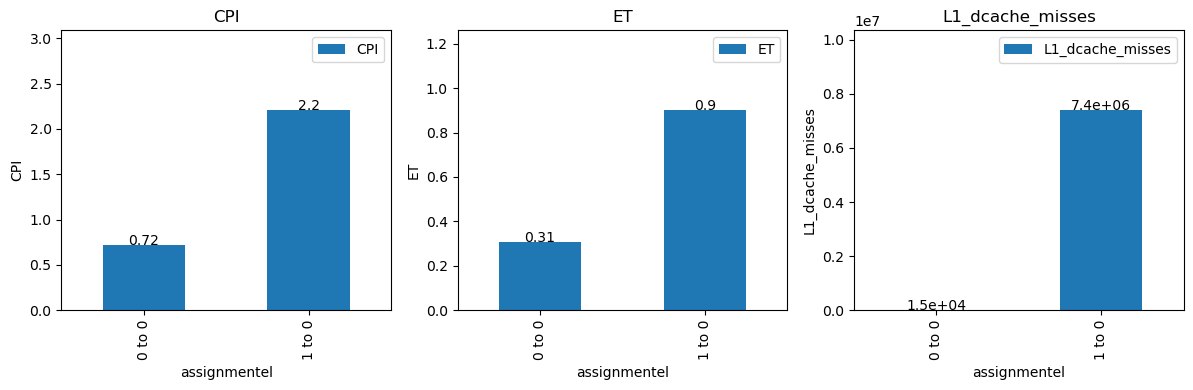

In [18]:
df = render_csv("coherence.csv") df["other_core"] = df["arg2"] df["this_core"] =\ 
df["arg3"] df["assignmentel"] = df["arg2"].astype(str) + " to " +\ 
df["arg3"].astype(str)  df["IC per increment"] = df["IC"]/df["arg1"] df["Cycles\ 
per increment"] = df["Cycles"]/df["arg1"] display_mono(df[["threads", "size",\ 
"arg1", "this_core", "other_core", "arg3", "IC", "CPI", "CT", "ET",\ 
"L1_dcache_miss_rate"]]) plotPEBar(df=df,  what=[("assignmentel", "CPI"),\ 
("assignmentel", "ET"), ("assignmentel", "L1_dcache_misses")])

,threads,size,arg1,other_core,arg3,IC,CPI,CT,ET,L1_dcache_miss_rate
0,1,1048576,10000000,0,0,105397285,0.711024,0.432479,0.032410,0.000284
1,1,1048576,10000000,1,0,97256127,0.937709,0.230115,0.020986,0.017682


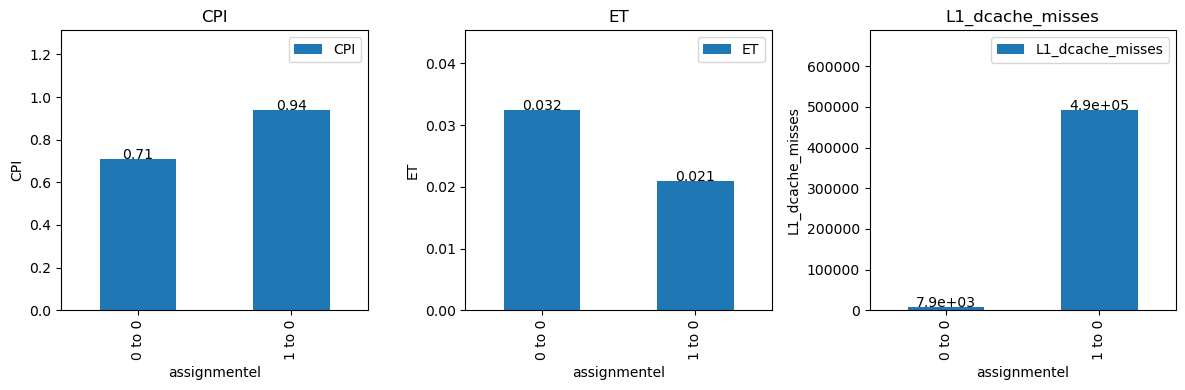

In [20]:
df = render_csv("false_sharing.csv") df["other_core"] = df["arg2"]\ 
df["this_core"] = df["arg3"] df["assignmentel"] = df["arg2"].astype(str) + " to\ 
" + df["arg3"].astype(str)  df["IC per increment"] = df["IC"]/df["arg1"]\ 
df["Cycles per increment"] = df["Cycles"]/df["arg1"] display_mono(df[["threads",\ 
"size", "arg1", "other_core", "arg3", "IC", "CPI", "CT", "ET",\ 
"L1_dcache_miss_rate"]]) plotPEBar(df=df,  what=[("assignmentel", "CPI"),\ 
("assignmentel", "ET"), ("assignmentel", "L1_dcache_misses")])

<div class="alert alert-block alert-success">


### Question 5 (CSE142 & CSE142L)    



How much difference in performance do you see between running both threads on one core vs. running them on two cores?
    

</div>

<div class="alert alert-block alert-success">   


Please make sure to include your calculations and clearly state the final answer in this cell. If necessary, you should use LaTeX syntax for equations and formulas. Your answers must base on the experiments above.

Answer: 0.032410/0.020986 =1.54436290861
    The total difference in performance is that the two cores is running 1.54436290861x faster
    


</div>

<div class="alert alert-block alert-warning">



### Question 6 (CSE142L Only)    



Add a single line to the code above to get the 2x performance improvement we seek. (Hint:  The memory system thinks in cache lines and so should you).
    

</div>

Done code generation...
make: 'fiddle.exe' is up to date.
make: Warning: File 'build/false_sharing_2.so' has modification time 15 s in the future
mkdir -p build/ 
cp *.hpp build/
cp *.h   build/
g++-9  -DHAVE_LINUX_PERF_EVENT_H -pthread -DHAVE_LINUX_PERF_EVENT_H -I/home/dlwang/2025su-cse142-cse142l-parallelism-starter -g -O3 -fopenmp -lm -pthread -lboost_program_options -L/usr/lib/ -lboost_system -ldl  -rdynamic -fPIC -shared -o build/false_sharing_2.so build/false_sharing_2.cpp
make: warning:  Clock skew detected.  Your build may be incomplete.
Running on the cloud for: dlwang@ucsd.edu
registering function: false_sharing_2
Dynamically registering false_sharing_2
Execution started
Execution completed


,threads,size,arg1,other_core,arg3,IC,CPI,CT,ET,L1_dcache_miss_rate
0,1,1048576,10000000,0,0,105397285,0.711024,0.432479,0.032410,0.000284
1,1,1048576,10000000,1,0,97256127,0.937709,0.230115,0.020986,0.017682
2,1,1048576,10000000,0,0,105384476,0.790986,0.378346,0.031538,0.000283
3,1,1048576,10000000,1,0,93881830,0.665400,0.294338,0.018387,0.000177


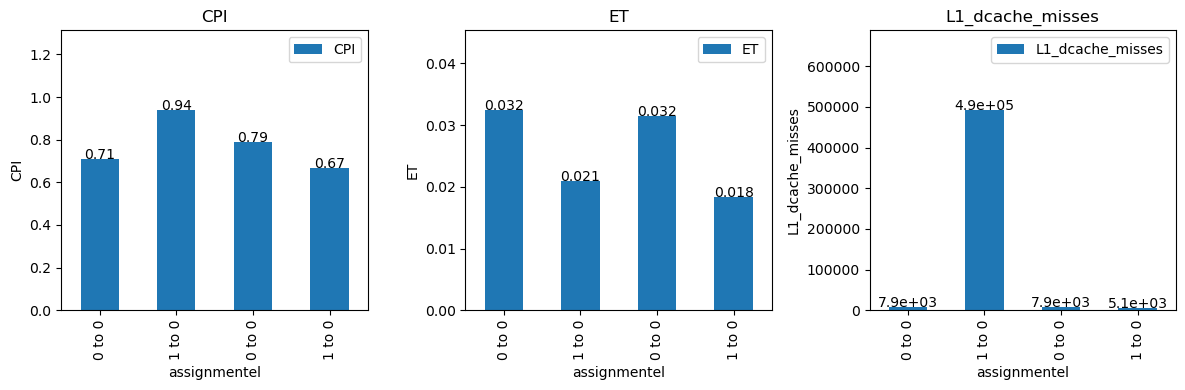

In [63]:
# Please modify the following code in "false_sharing_2" and show result!  t =\ 
fiddle("false_sharing_2.cpp", function="false_sharing_2", opt="-O3", code=r"""\ 
#include"function_map.hpp" #include<cstdint> #include<thread> #include<mutex>\ 
#include"threads.hpp" #include"pthread.h"  volatile int shared = 0; volatile int\ 
not_shared_0 = 0;     uint64_t filler[8]; volatile int not_shared_1 = 0;  void\ 
go_0(uint64_t id,int count) {     for(int i= 0; i < count; i++){\ 
not_shared_0++;     } }  void go_1(uint64_t id,int count) {     for(int i= 0; i\ 
< count; i++){         not_shared_1++;     } }  extern "C" uint64_t*\ 
false_sharing_2(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t\ 
arg1, uint64_t arg2, uint64_t arg3) {     shared = 0;     std::thread other\ 
(go_0, 1, arg1);     bind_to_core(other, arg2);\ 
bind_to_core(pthread_self(), arg3);     go_1(0, arg1);     other.join();\ 
shared = not_shared_0 + not_shared_1;     return data; }\ 
FUNCTION(one_array_2arg, false_sharing_2); """)   ! make fiddle.exe; make\ 
C_OPTS="-O3" build/false_sharing_2.so ! cse142 run "./fiddle.exe -lib\ 
./build/false_sharing_2.so -M 3700 --detail -f false_sharing_2 --arg1 10000000\ 
--arg2 0 1   --arg3 0 -o false_sharing_2.csv"\ 
df=render_csv(["false_sharing.csv","false_sharing_2.csv"]) df["other_core"] =\ 
df["arg2"] df["this_core"] = df["arg3"] df["assignmentel"] =\ 
df["arg2"].astype(str) + " to " + df["arg3"].astype(str)  df["IC per increment"]\ 
= df["IC"]/df["arg1"] df["Cycles per increment"] = df["Cycles"]/df["arg1"]\ 
display_mono(df[["threads", "size", "arg1", "other_core", "arg3", "IC", "CPI",\ 
"CT", "ET", "L1_dcache_miss_rate"]]) plotPEBar(df=df,  what=[("assignmentel",\ 
"CPI"), ("assignmentel", "ET"), ("assignmentel", "L1_dcache_misses")])

<div class="alert alert-block alert-success">


### Question 7 (CSE142 & CSE142L)    



Would this code benefit from tiling as a locality optimization?  Why or why not? 


</div>

<div class="alert alert-block alert-success">    


Answer: No, as the cache miss rate is relatively low and tiling helps spatial locality, which isnt a problem here. Tiling properly would require multiple histogram threads that only updates locally until when all the threads are done, combining at the end.
        
Please explain in detail to receive credits
</div>

,index,function,threads,size,arg1,arg2,arg3,IC,CPI,ET,L1_dcache_misses,L1_dcache_miss_rate,speedup,Total IC,Total cache misses
0,0,run_unthreaded_histogram,1,10000000,1,1,1,297668806,0.296044,0.040768,1139737,0.006413,1.000000,297668806,1139737
1,0,run_threaded_histogram,1,10000000,1,1,1,4804320935,0.645961,1.176817,1173272,0.000686,0.034643,4804320935,1173272
2,1,run_threaded_histogram,2,10000000,1,1,1,10135282063,2.527131,4.952880,82942523,0.021894,0.008231,20270564126,165885046
3,2,run_threaded_histogram,3,10000000,1,1,1,12250990706,2.905678,4.865214,139144613,0.030132,0.008379,36752972118,417433839
4,3,run_threaded_histogram,4,10000000,1,1,1,16805729207,3.060358,6.211050,230530971,0.036229,0.006564,67222916828,922123884
5,4,run_threaded_histogram,5,10000000,1,1,1,21736706538,3.149658,7.370441,337068099,0.040688,0.005531,108683532690,1685340495
6,5,run_threaded_histogram,6,10000000,1,1,1,26497699888,3.209106,8.136385,451842212,0.044759,0.005011,158986199328,2711053272
7,6,run_threaded_histogram,7,10000000,1,1,1,37311786012,4.018414,12.718664,704576112,0.049433,0.003205,261182502084,4932032784
8,7,run_threaded_histogram,8,10000000,1,1,1,44784475369,4.445502,14.672713,910105708,0.053595,0.002778,358275802952,7280845664


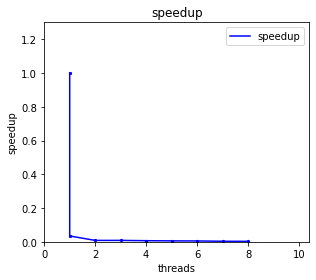

In [28]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_threaded.csv"],\ 
columns=hist_columns) hist_data["speedup"] =\ 
hist_data.iloc[0]["ET"]/hist_data["ET"] hist_data["Total IC"] =\ 
hist_data["IC"]*hist_data["threads"] hist_data["Total cache misses"] =\ 
hist_data["L1_dcache_misses"]*hist_data["threads"] display(hist_data)\ 
plotPE(df=hist_data, lines=True, what=[("threads", "speedup")])

<div class="alert alert-block alert-success">

    
### Question 8 (CSE142 & CSE142L)


How much speedup do you observe with 4 threads? Why?


</div>

<div class="alert alert-block alert-success">    
<div class="answer">
[Please include your calculations in addition to the numerical result. Your answer should come from the experiment above and should include LaTeX forumla if necessary.]

**Speedup:** 0.040768/6.211050 =0.00656378551 

**Why:** Speedup is limited due to the locks in the code
    
        
</div>
</div>

<div class="alert alert-block alert-warning">


### Question 9 (CSE142L Only)    



What causes the drop in performance from 1 thread to 2?  How can we fix it?
    
</div>

<div class="alert alert-block alert-warning">    

[Be sure to provide good enough guess explaination even though this is a completeness one.]

Answer: May be due to cache misses from multiple threads interfering with b*thread_count + id. I'm not entirely sure why this is.
    
    

        
</div>

<div class="alert alert-block alert-info">


### Question 10 (CSE142 Only) 



What is $x$ for parallel merge sort?  Can you bound speedup for 4 processors, a threshold of 1024, and a total array size of 4096?  If you can't get a precise answer try to estimate or provide an upper bound the value of $x$.
    
</div>


<div class="alert alert-block alert-info">  


Please observe the above code and explain/justify your estimation.

Answer: using big-O, we can get x down to   $x= 1 - \frac{1}{\lg n}$
    
    Using amdahl's law, with p=4 and x = $1 - \frac{1}{\lg 4096}$, we get an upper bound of 3.2

        
</div>

<div class="alert alert-block alert-warning">


### Question 11 (CSE142L Only) 

On Linux, you can use the command `taskset -c list_of_available_cores` to restrict the scheduling policy to allocate your threads on the given set of processors. Can you modified the cell below and find out what's the best list that can deliver the best performance for the runing the histogram program with 4 threads?
    
Remember that we have 36 logical processors. So the list should only has numbers from 0 to 71.
    
</div>


In [45]:
# Please run your experiments below using `taskset` command to find out the 4\ 
! cse142 run "taskset -c 0,1,18,19 ./fiddle.exe -lib ./build/histogram.so -M\ 
3700 --detail -f run_private2_histogram --size 10000000 --threads 4 -o\ 
histogram_taskset.csv" ! cse142 run "taskset -c 0,1,2,3 ./fiddle.exe -lib\ 
./build/histogram.so -M 3700 --detail -f run_private2_histogram --size 10000000\ 
--threads 4 -o histogram_taskset_2.csv"\ 
display_mono(render_csv(["histogram_taskset.csv","histogram_taskset_2.csv"]))

Running on the cloud for: dlwang@ucsd.edu
registering function: run_unthreaded_histogram
registering function: run_threaded_histogram
registering function: run_fine_locks_histogram
registering function: run_private_histogram
registering function: run_private2_histogram
registering function: run_openmp_histogram
registering function: run_openmp_private_histogram
Dynamically registering run_fine_locks_histogram
Dynamically registering run_openmp_histogram
Dynamically registering run_openmp_private_histogram
Dynamically registering run_private2_histogram
Dynamically registering run_private_histogram
Dynamically registering run_threaded_histogram
Dynamically registering run_unthreaded_histogram
Execution started
Execution completed
Running on the cloud for: dlwang@ucsd.edu
registering function: run_unthreaded_histogram
registering function: run_threaded_histogram
registering function: run_fine_locks_histogram
registering function: run_private_histogram
registering function: run_private2_hi

,index,reps,size,size2,threads,arg1,arg2,arg3,function,IC,Cycles,CPI,CT,ET,L1_dcache_miss_rate,L1_dcache_misses,L1_dcache_accesses,branches,branch_misses
0,0,1,10000000,16384,4,1,1,1,run_private2_histogram,330387799,428080502,1.295691,0.122680,0.052517,0.016938,3053827,180295382,5327,8602549
1,0,1,10000000,16384,4,1,1,1,run_private2_histogram,314772471,377439469,1.199087,0.137945,0.052066,0.028775,5044619,175310535,6335,8763260


<div class="alert alert-block alert-warning">  


Please observe the above experiments that you modified and discuss what's the best combination.

Answer: 

        
</div>